# Классификация действии по распознаванием действии

__Задача состоить из нескольких процессов__

1. Распознавание и получение данных(Получено...)
2. Нормализация и препроцессинг
3. Транформация данных для классификации
4. Классификация
5. Оценка классификации

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)
pd.options.display.max_rows = 10

__Чтение данных__

In [2]:
#df = pd.concat([pd.read_csv('TestDataSet.csv', sep=';'), pd.read_csv('WalkTest.csv'), pd.read_csv('JumpForwardData.csv')])
df = pd.concat([pd.read_csv('TestDataSet.csv', sep=';'), pd.read_csv('WalkTest.csv')])
df

,id,Nose_x0,Nose_y0,Neck_x1,Neck_y1,RShoulder_x2,RShoulder_y2,Relbow_x3,RElbow_y3,RWrist_x4,...,REye_x14,REye_y14,LEye_x15,LEye_y15,REar_x16,REar_y16,LEar_x17,LEar_y17,action,video_src
0,1267,162.0,60.0,166.0,67.0,163.0,66.0,162.0,74.0,158.0,...,161.0,59.0,163.0,59.0,0.0,0.0,165.0,60.0,walk,C:/Users/User/tf-pose-estimationActionRecognit...
1,1268,159.0,61.0,163.0,67.0,162.0,67.0,160.0,74.0,156.0,...,159.0,59.0,160.0,59.0,0.0,0.0,163.0,60.0,walk,C:/Users/User/tf-pose-estimationActionRecognit...
2,1269,158.0,61.0,163.0,67.0,160.0,67.0,159.0,75.0,153.0,...,158.0,59.0,158.0,59.0,0.0,0.0,161.0,60.0,walk,C:/Users/User/tf-pose-estimationActionRecognit...
3,1270,156.0,61.0,160.0,67.0,159.0,67.0,157.0,75.0,153.0,...,156.0,59.0,157.0,59.0,0.0,0.0,159.0,60.0,walk,C:/Users/User/tf-pose-estimationActionRecognit...
4,1271,154.0,60.0,158.0,67.0,157.0,67.0,155.0,75.0,150.0,...,154.0,59.0,155.0,59.0,0.0,0.0,158.0,60.0,walk,C:/Users/User/tf-pose-estimationActionRecognit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2551,153.0,28.0,144.0,36.0,144.0,37.0,139.0,50.0,136.0,...,153.0,27.0,154.0,27.0,149.0,26.0,NaN,NaN,walk,person01_walking_d1_uncomp.avi
111,2552,156.0,29.0,147.0,37.0,149.0,38.0,142.0,52.0,139.0,...,156.0,28.0,NaN,NaN,152.0,27.0,NaN,NaN,walk,person01_walking_d1_uncomp.avi
112,2553,156.0,29.0,152.0,36.0,149.0,37.0,147.0,50.0,144.0,...,156.0,28.0,157.0,29.0,154.0,28.0,NaN,NaN,walk,person01_walking_d1_uncomp.avi
113,2554,156.0,29.0,155.0,37.0,153.0,37.0,149.0,53.0,148.0,...,156.0,28.0,157.0,28.0,156.0,28.0,NaN,NaN,walk,person01_walking_d1_uncomp.avi


In [3]:
df[df.action != 'walk'].video_src.drop_duplicates()

716     C:/Users/User/tf-pose-estimationActionRecognit...
783     C:/Users/User/tf-pose-estimationActionRecognit...
850     C:/Users/User/tf-pose-estimationActionRecognit...
895     C:/Users/User/tf-pose-estimationActionRecognit...
938     C:/Users/User/tf-pose-estimationActionRecognit...
1010    C:/Users/User/tf-pose-estimationActionRecognit...
1057    C:/Users/User/tf-pose-estimationActionRecognit...
1097    C:/Users/User/tf-pose-estimationActionRecognit...
1136    C:/Users/User/tf-pose-estimationActionRecognit...
Name: video_src, dtype: object

In [4]:
pd.DataFrame(df.values)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1267,162,60,166,67,163,66,162,74,158,...,161,59,163,59,0,0,165,60,walk,C:/Users/User/tf-pose-estimationActionRecognit...
1,1268,159,61,163,67,162,67,160,74,156,...,159,59,160,59,0,0,163,60,walk,C:/Users/User/tf-pose-estimationActionRecognit...
2,1269,158,61,163,67,160,67,159,75,153,...,158,59,158,59,0,0,161,60,walk,C:/Users/User/tf-pose-estimationActionRecognit...
3,1270,156,61,160,67,159,67,157,75,153,...,156,59,157,59,0,0,159,60,walk,C:/Users/User/tf-pose-estimationActionRecognit...
4,1271,154,60,158,67,157,67,155,75,150,...,154,59,155,59,0,0,158,60,walk,C:/Users/User/tf-pose-estimationActionRecognit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,2551,153,28,144,36,144,37,139,50,136,...,153,27,154,27,149,26,NaN,NaN,walk,person01_walking_d1_uncomp.avi
1285,2552,156,29,147,37,149,38,142,52,139,...,156,28,NaN,NaN,152,27,NaN,NaN,walk,person01_walking_d1_uncomp.avi
1286,2553,156,29,152,36,149,37,147,50,144,...,156,28,157,29,154,28,NaN,NaN,walk,person01_walking_d1_uncomp.avi
1287,2554,156,29,155,37,153,37,149,53,148,...,156,28,157,28,156,28,NaN,NaN,walk,person01_walking_d1_uncomp.avi


In [5]:
df.video_src.drop_duplicates()

0       C:/Users/User/tf-pose-estimationActionRecognit...
84      C:/Users/User/tf-pose-estimationActionRecognit...
168     C:/Users/User/tf-pose-estimationActionRecognit...
236     C:/Users/User/tf-pose-estimationActionRecognit...
309     C:/Users/User/tf-pose-estimationActionRecognit...
                              ...                        
1010    C:/Users/User/tf-pose-estimationActionRecognit...
1057    C:/Users/User/tf-pose-estimationActionRecognit...
1097    C:/Users/User/tf-pose-estimationActionRecognit...
1136    C:/Users/User/tf-pose-estimationActionRecognit...
0                          person01_walking_d1_uncomp.avi
Name: video_src, Length: 20, dtype: object

In [6]:
df.video_src.drop_duplicates()

0       C:/Users/User/tf-pose-estimationActionRecognit...
84      C:/Users/User/tf-pose-estimationActionRecognit...
168     C:/Users/User/tf-pose-estimationActionRecognit...
236     C:/Users/User/tf-pose-estimationActionRecognit...
309     C:/Users/User/tf-pose-estimationActionRecognit...
                              ...                        
1010    C:/Users/User/tf-pose-estimationActionRecognit...
1057    C:/Users/User/tf-pose-estimationActionRecognit...
1097    C:/Users/User/tf-pose-estimationActionRecognit...
1136    C:/Users/User/tf-pose-estimationActionRecognit...
0                          person01_walking_d1_uncomp.avi
Name: video_src, Length: 20, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 0 to 114
Data columns (total 39 columns):
id              1289 non-null int64
Nose_x0         1286 non-null float64
Nose_y0         1286 non-null float64
Neck_x1         1288 non-null float64
Neck_y1         1288 non-null float64
RShoulder_x2    1287 non-null float64
RShoulder_y2    1287 non-null float64
Relbow_x3       1268 non-null float64
RElbow_y3       1268 non-null float64
RWrist_x4       1243 non-null float64
RWrist_y4       1243 non-null float64
LShoulder_x5    1285 non-null float64
LShoulder_y5    1285 non-null float64
LElbow_x6       1247 non-null float64
LElbow_y6       1247 non-null float64
LWrist_x7       1238 non-null float64
LWrist_y7       1238 non-null float64
RHip_x8         1286 non-null float64
RHip_y8         1286 non-null float64
RKnee_x9        1282 non-null float64
RKnee_y9        1282 non-null float64
RAnkle_x10      1271 non-null float64
RAnkle_y10      1271 non-null float64
LHip_x11        1286 n

In [8]:
df.index = df.id
x = df.drop(['id'], axis=1)
x = x.fillna(0)
x

,Nose_x0,Nose_y0,Neck_x1,Neck_y1,RShoulder_x2,RShoulder_y2,Relbow_x3,RElbow_y3,RWrist_x4,RWrist_y4,...,REye_x14,REye_y14,LEye_x15,LEye_y15,REar_x16,REar_y16,LEar_x17,LEar_y17,action,video_src
id,,,,,,,,,,,,,,,,,,,,,
1267,162.0,60.0,166.0,67.0,163.0,66.0,162.0,74.0,158.0,78.0,...,161.0,59.0,163.0,59.0,0.0,0.0,165.0,60.0,walk,C:/Users/User/tf-pose-estimationActionRecognit...
1268,159.0,61.0,163.0,67.0,162.0,67.0,160.0,74.0,156.0,78.0,...,159.0,59.0,160.0,59.0,0.0,0.0,163.0,60.0,walk,C:/Users/User/tf-pose-estimationActionRecognit...
1269,158.0,61.0,163.0,67.0,160.0,67.0,159.0,75.0,153.0,79.0,...,158.0,59.0,158.0,59.0,0.0,0.0,161.0,60.0,walk,C:/Users/User/tf-pose-estimationActionRecognit...
1270,156.0,61.0,160.0,67.0,159.0,67.0,157.0,75.0,153.0,79.0,...,156.0,59.0,157.0,59.0,0.0,0.0,159.0,60.0,walk,C:/Users/User/tf-pose-estimationActionRecognit...
1271,154.0,60.0,158.0,67.0,157.0,67.0,155.0,75.0,150.0,79.0,...,154.0,59.0,155.0,59.0,0.0,0.0,158.0,60.0,walk,C:/Users/User/tf-pose-estimationActionRecognit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,153.0,28.0,144.0,36.0,144.0,37.0,139.0,50.0,136.0,62.0,...,153.0,27.0,154.0,27.0,149.0,26.0,0.0,0.0,walk,person01_walking_d1_uncomp.avi
2552,156.0,29.0,147.0,37.0,149.0,38.0,142.0,52.0,139.0,64.0,...,156.0,28.0,0.0,0.0,152.0,27.0,0.0,0.0,walk,person01_walking_d1_uncomp.avi
2553,156.0,29.0,152.0,36.0,149.0,37.0,147.0,50.0,144.0,65.0,...,156.0,28.0,157.0,29.0,154.0,28.0,0.0,0.0,walk,person01_walking_d1_uncomp.avi


__Приводим классы в нумерованный вид__

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(x['action'])
x['label'] = le.transform(x['action'])
x = x.drop(['action'], axis=1)
x

,Nose_x0,Nose_y0,Neck_x1,Neck_y1,RShoulder_x2,RShoulder_y2,Relbow_x3,RElbow_y3,RWrist_x4,RWrist_y4,...,REye_x14,REye_y14,LEye_x15,LEye_y15,REar_x16,REar_y16,LEar_x17,LEar_y17,video_src,label
id,,,,,,,,,,,,,,,,,,,,,
1267,162.0,60.0,166.0,67.0,163.0,66.0,162.0,74.0,158.0,78.0,...,161.0,59.0,163.0,59.0,0.0,0.0,165.0,60.0,C:/Users/User/tf-pose-estimationActionRecognit...,1
1268,159.0,61.0,163.0,67.0,162.0,67.0,160.0,74.0,156.0,78.0,...,159.0,59.0,160.0,59.0,0.0,0.0,163.0,60.0,C:/Users/User/tf-pose-estimationActionRecognit...,1
1269,158.0,61.0,163.0,67.0,160.0,67.0,159.0,75.0,153.0,79.0,...,158.0,59.0,158.0,59.0,0.0,0.0,161.0,60.0,C:/Users/User/tf-pose-estimationActionRecognit...,1
1270,156.0,61.0,160.0,67.0,159.0,67.0,157.0,75.0,153.0,79.0,...,156.0,59.0,157.0,59.0,0.0,0.0,159.0,60.0,C:/Users/User/tf-pose-estimationActionRecognit...,1
1271,154.0,60.0,158.0,67.0,157.0,67.0,155.0,75.0,150.0,79.0,...,154.0,59.0,155.0,59.0,0.0,0.0,158.0,60.0,C:/Users/User/tf-pose-estimationActionRecognit...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,153.0,28.0,144.0,36.0,144.0,37.0,139.0,50.0,136.0,62.0,...,153.0,27.0,154.0,27.0,149.0,26.0,0.0,0.0,person01_walking_d1_uncomp.avi,1
2552,156.0,29.0,147.0,37.0,149.0,38.0,142.0,52.0,139.0,64.0,...,156.0,28.0,0.0,0.0,152.0,27.0,0.0,0.0,person01_walking_d1_uncomp.avi,1
2553,156.0,29.0,152.0,36.0,149.0,37.0,147.0,50.0,144.0,65.0,...,156.0,28.0,157.0,29.0,154.0,28.0,0.0,0.0,person01_walking_d1_uncomp.avi,1


__Функция для того чтобы сделать много данных для задачи классификации__

In [11]:
def to10frames(x):
    result = []
    y = []
    for i in x.video_src.drop_duplicates().tolist():
        for j in range(x[x.video_src == i].values.shape[0]-10):
            result.append(x[x.video_src == i].values[j:j+10,:-2].reshape(360).tolist())
            y.append([x[x.video_src == i].values[j,-1]])
        
    return np.array(result), np.array(y)

## Получение обработка данных для классификации

In [12]:
x, y = to10frames(x)
print(x)
print(y)

[[162.  60. 166. ...   0. 150.  58.]
 [159.  61. 163. ...   0. 148.  58.]
 [158.  61. 163. ...   0. 146.  58.]
 ...
 [131.  26. 122. ...  27.   0.   0.]
 [136.  25. 125. ...  28.   0.   0.]
 [137.  25. 128. ...  28.   0.   0.]]
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


## $$f(x_i) = x_i * (float)random(0:5) + (float)random(0:50)$$

In [20]:
x[0]*np.random.random(size=x[0].shape[0]) + np.random.random(size=x[0].shape[0])*10

array([ 94.97005688,  26.08636809,  42.61262277,  62.90566626,
         9.55450613,  50.79095234, 149.98617421,  57.10546899,
       155.25241792,  31.34062397,  45.52765266,  35.36087223,
        15.58859804,  41.89751716,  76.45571915,  42.8475334 ,
       138.11249754,  43.18503255,  26.01189457,  15.46547353,
        66.0568255 ,  39.36108305, 117.0426573 ,  34.64906226,
        39.48608523,  33.12447714,  99.94669886,  64.70053637,
       131.40726827,  49.04571292, 140.61097339,  13.41884149,
         6.89528183,   8.77906076,  62.54251103,  49.81506161,
        54.73938685,   8.10521553, 123.87840332,  60.68406763,
       105.7190494 ,  32.58265761, 139.07267792,  68.96820037,
        48.7985744 ,  80.28869394,  68.81031353,  48.99309702,
        99.58899649,  21.24467979,  28.2541344 ,  23.890963  ,
        68.86870015,  13.95834042,  77.24214362,  96.56899077,
       161.16715687,  35.47692411,  53.87988955,  22.0045023 ,
        75.41178197,  35.60008699,  88.4196297 ,  86.24

In [21]:
first = np.array(list(map(lambda x:x*np.random.random(size=1)*5 + np.random.random(size=1)*50, x)))
second = np.array(list(map(lambda x:x*np.random.random(size=x.shape[0]) + np.random.random(size=x.shape[0])*10, x)))


In [49]:
x = np.concatenate((first, second), axis=0)
y = np.concatenate((y, np.array([2]*second.shape[0]).reshape((second.shape[0],1))), axis=0)

In [50]:
x

array([[386.34886653, 147.52555824, 395.71448647, ...,   7.04125924,
        358.25200673, 142.84274827],
       [600.91676163, 256.59876328, 614.97055748, ...,  42.27837655,
        562.26882304, 246.05841639],
       [481.39478556, 189.60913547, 496.43528298, ...,   6.11506687,
        445.29759173, 180.58483702],
       ...,
       [ 64.52553685,  31.61493953,  46.53308627, ...,  16.01134717,
          4.26424792,   4.24154995],
       [107.14553935,  10.3448592 ,  34.71437961, ...,  19.08367232,
          2.94435188,   2.45834093],
       [ 20.54930257,  23.8653377 ,   9.50746499, ...,  28.07769977,
          6.3416946 ,   5.98427105]])

In [51]:
y

array([[1],
       [1],
       [1],
       ...,
       [2],
       [2],
       [2]])

C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Us

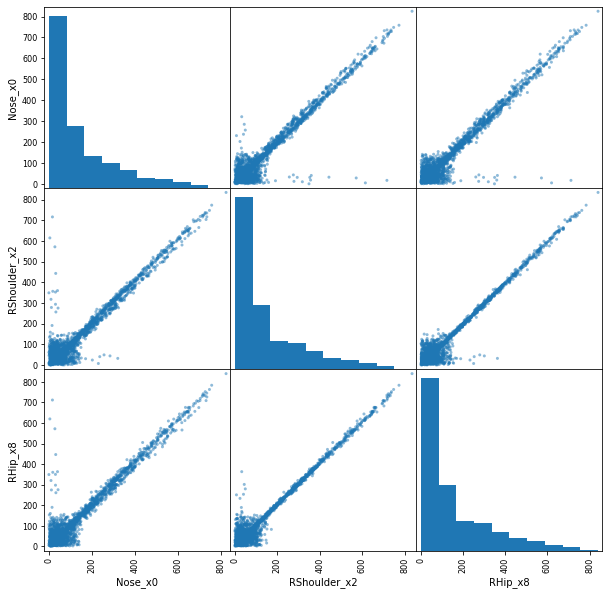

In [52]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(x[:,:36], columns=df.columns[1:-2].tolist())
list_cols = ['Nose_x0', 'RShoulder_x2', 'RHip_x8']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

__Truncated SVD tranformation__

## __Формула стандартизации__
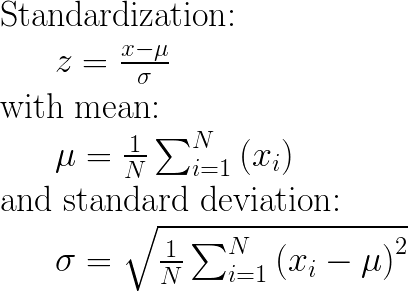

In [53]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_scaled = SS.fit_transform(x)

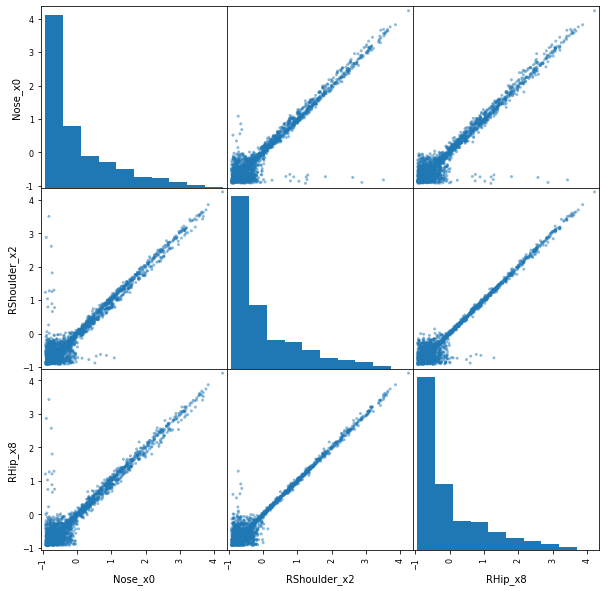

In [54]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(X_scaled[:,:36], columns=df.columns[1:-2].tolist())
list_cols = ['Nose_x0', 'RShoulder_x2', 'RHip_x8']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

## Min Max scaler

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_minmaxscaled = scaler.fit_transform(x)

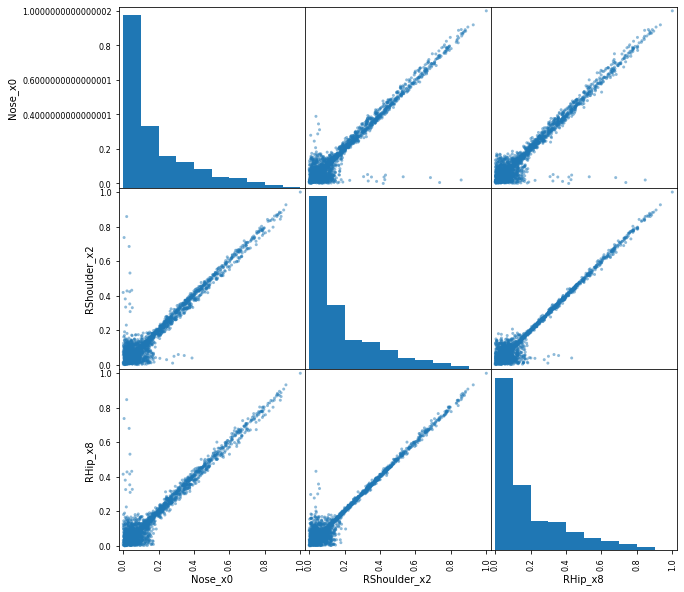

In [56]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(X_minmaxscaled[:,:36], columns=df.columns[1:-2].tolist())
list_cols = ['Nose_x0', 'RShoulder_x2', 'RHip_x8']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

## __Формула нормализации по L2 регуляризатор__

__для l1 regularization (Lasso)__ $$X[i,j] = \frac{X[i,j]}{||X_i||_1}\$$

__для l2 regularization (Ridge)__ $$X[i,j] = \frac{X[i,j]}{||X_i||_2}\$$

$$z = ||X||_1 = \sum_{i=1}^n|x_i|$$

$$z = ||X||_2 = \sqrt{\sum_{i=1}^nx_i^2}$$


In [57]:
from sklearn.preprocessing import normalize
X_normalized = normalize(x, 'l2')
print(X_normalized)

[[0.07060274 0.02695934 0.07231425 ... 0.00128674 0.06546822 0.02610358]
 [0.06905303 0.02948648 0.07066799 ... 0.00485833 0.06461189 0.02827526]
 [0.07013532 0.02762451 0.07232659 ... 0.00089092 0.06487625 0.02630975]
 ...
 [0.05956782 0.02918585 0.04295779 ... 0.01478114 0.00393661 0.00391566]
 [0.10877465 0.01050215 0.0352422  ... 0.01937383 0.00298912 0.00249572]
 [0.01859863 0.02159989 0.00860496 ... 0.02541239 0.0057397  0.00541621]]


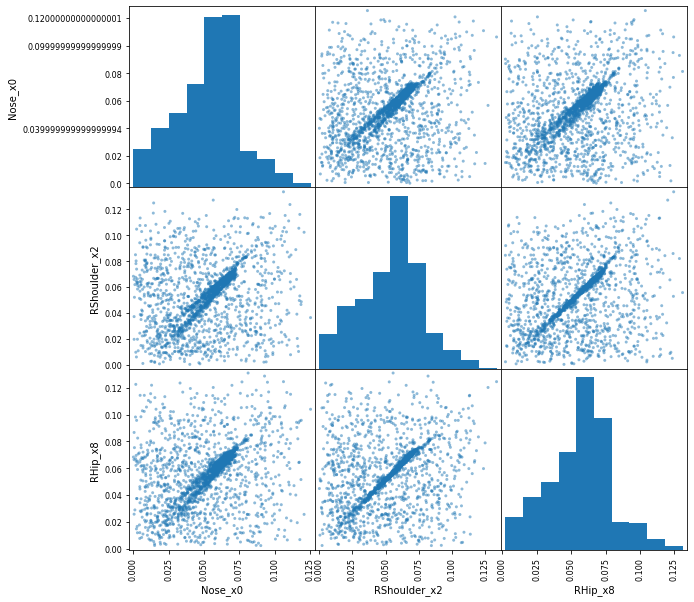

In [84]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(X_normalized[:,:36], columns=df.columns[1:-2].tolist())
list_cols = ['Nose_x0', 'RShoulder_x2', 'RHip_x8']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Us

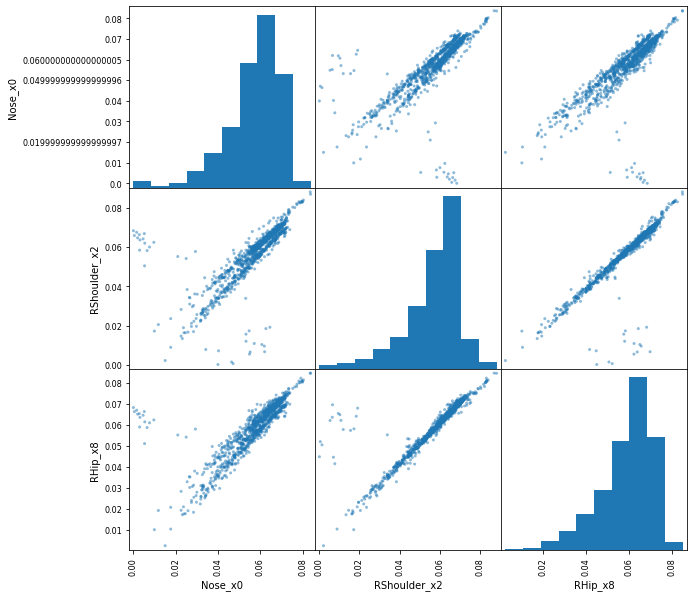

In [79]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(X_normalized[:first.shape[0],:36], columns=df.columns[1:-2].tolist())
list_cols = ['Nose_x0', 'RShoulder_x2', 'RHip_x8']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

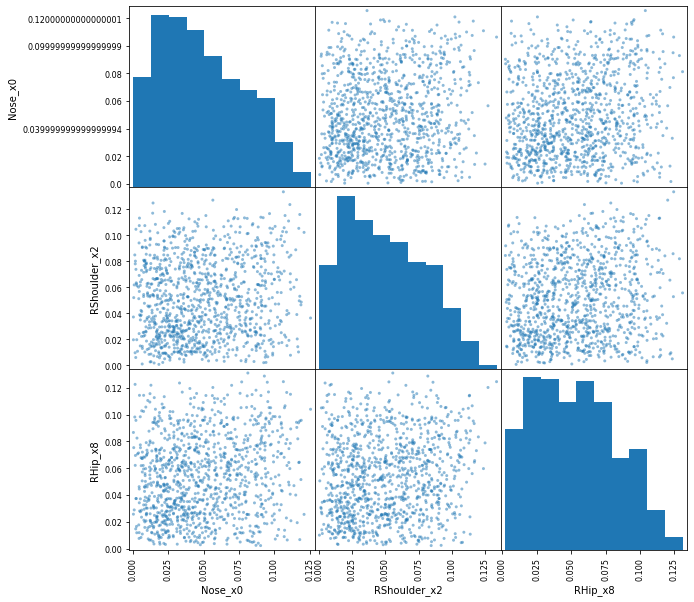

In [80]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(X_normalized[first.shape[0]:,:36], columns=df.columns[1:-2].tolist())
list_cols = ['Nose_x0', 'RShoulder_x2', 'RHip_x8']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

# Разделение на train and test

## Truncated SVD

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(871, 360)
(218, 360)


In [127]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
svd.fit(X_train)
X_train = svd.transform(X_train)
X_test = svd.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(871, 100)
(218, 100)


In [128]:
X_train = normalize(X_train, 'l2')
X_test = normalize(X_test, 'l2')

In [129]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              precision    recall  f1-score   support

jump forward       0.84      0.61      0.71       100
        walk       0.73      0.90      0.81       118

 avg / total       0.78      0.77      0.76       218



C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(111.12, 0.5, 'predicted label')

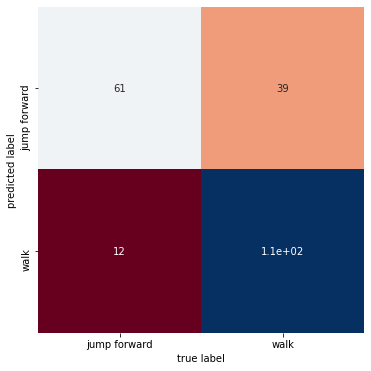

In [130]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = clf.predict(X_test)

target_names = le.inverse_transform(list(set(y.reshape(y.shape[0])))).tolist()
print(classification_report(y_test, predictions, target_names=target_names))

sns.heatmap(confusion_matrix(y_test, predictions), square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## SVD_1 * SVD_2

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(871, 360)
(218, 360)


In [132]:
u1, s1, v1 = np.linalg.svd(X_train)
u2, s2, v2 = np.linalg.svd(X_test*5)

In [133]:
k = 4
print(X_test.shape)
print((u2[:, :k] @ np.diag(s1[:k]) @v1[:k, :]).shape)

(218, 360)
(218, 360)


In [134]:
np.corrcoef(X_test, u2[:, :k] @ np.diag(s1[:k]) @v1[:k, :])

array([[ 1.        ,  0.40736705, -0.00269879, ...,  0.70460301,
         0.81495184,  0.66962803],
       [ 0.40736705,  1.        ,  0.17165694, ...,  0.77983765,
         0.2161466 ,  0.00627149],
       [-0.00269879,  0.17165694,  1.        , ..., -0.08172073,
         0.09871743,  0.26610657],
       ...,
       [ 0.70460301,  0.77983765, -0.08172073, ...,  1.        ,
         0.47685333,  0.21972152],
       [ 0.81495184,  0.2161466 ,  0.09871743, ...,  0.47685333,
         1.        ,  0.9395178 ],
       [ 0.66962803,  0.00627149,  0.26610657, ...,  0.21972152,
         0.9395178 ,  1.        ]])

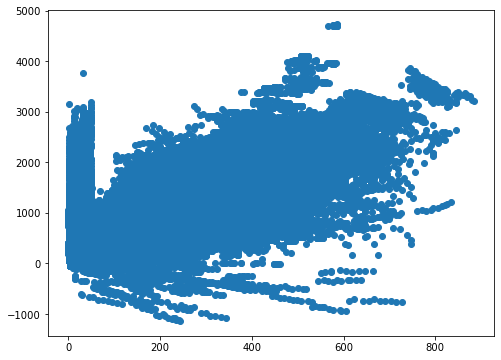

In [135]:
plt.scatter(X_test, (u2[:, :k] @ np.diag(s2[:k]) @v1[:k, :]))
plt.show()

In [136]:
X_test = (u2[:, :k] @ np.diag(s1[:k]) @v2[:k, :])/2

In [137]:
X_test

array([[214.55050645, 100.497439  , 227.2806286 , ...,   5.64688812,
        207.62864355, 113.08646777],
       [304.22892983, 126.56952856, 315.25250376, ..., 129.54854196,
        210.31544532,  89.44858313],
       [294.80418299, 272.39624902, 272.02964972, ..., 220.36245609,
         -2.55219158,  93.15702067],
       ...,
       [256.01595618, 226.11949039, 288.93754982, ...,  50.019181  ,
        265.15600051, 229.96771068],
       [ 16.48352424,   9.47471865,  16.4776369 , ...,   8.82586252,
          7.64491787,   4.8672643 ],
       [210.01107538, 101.11590717, 198.15950791, ..., 100.40115658,
         65.19570308,  29.29578212]])

In [138]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              precision    recall  f1-score   support

jump forward       0.52      0.14      0.22       100
        walk       0.55      0.89      0.68       118

 avg / total       0.54      0.55      0.47       218



C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(111.12, 0.5, 'predicted label')

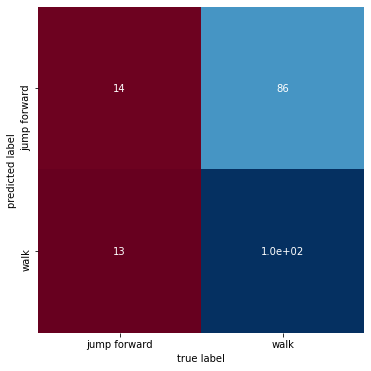

In [139]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = clf.predict(X_test)

target_names = le.inverse_transform(list(set(y.reshape(y.shape[0])))).tolist()
print(classification_report(y_test, predictions, target_names=target_names))

sns.heatmap(confusion_matrix(y_test, predictions), square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Training scaled

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(871, 360)
(218, 360)


In [141]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              precision    recall  f1-score   support

jump forward       0.81      0.65      0.72       100
        walk       0.75      0.87      0.80       118

 avg / total       0.78      0.77      0.77       218



C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(111.12, 0.5, 'predicted label')

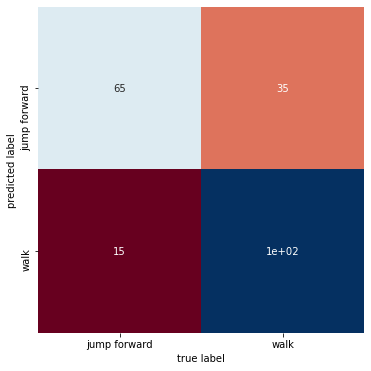

In [142]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = clf.predict(X_test)

target_names = le.inverse_transform(list(set(y.reshape(y.shape[0])))).tolist()
print(classification_report(y_test, predictions, target_names=target_names))

sns.heatmap(confusion_matrix(y_test, predictions), square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## training normalized

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, train_size=0.8, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(1742, 360)
(436, 360)


In [60]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, criterion='entropy')
clf.fit(X_train, y_train)

C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              precision    recall  f1-score   support

        jump       0.93      0.78      0.85        67
        walk       0.91      0.95      0.93       165
non-detected       0.98      1.00      0.99       204

 avg / total       0.94      0.94      0.94       436



Text(111.12, 0.5, 'predicted label')

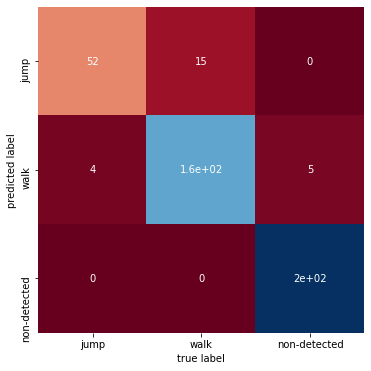

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = clf.predict(X_test)

target_names = ['jump', 'walk', 'non-detected']
print(classification_report(y_test, predictions, target_names=target_names))

sns.heatmap(confusion_matrix(y_test, predictions), square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## training minmax scaler

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_minmaxscaled, y, train_size=0.8, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(871, 360)
(218, 360)


In [147]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              precision    recall  f1-score   support

jump forward       0.75      0.62      0.68       100
        walk       0.72      0.82      0.77       118

 avg / total       0.73      0.73      0.73       218



C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(111.12, 0.5, 'predicted label')

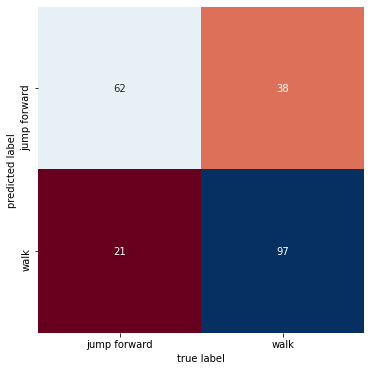

In [148]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = clf.predict(X_test)

target_names = le.inverse_transform(list(set(y.reshape(y.shape[0])))).tolist()
print(classification_report(y_test, predictions, target_names=target_names))

sns.heatmap(confusion_matrix(y_test, predictions), square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Visualization

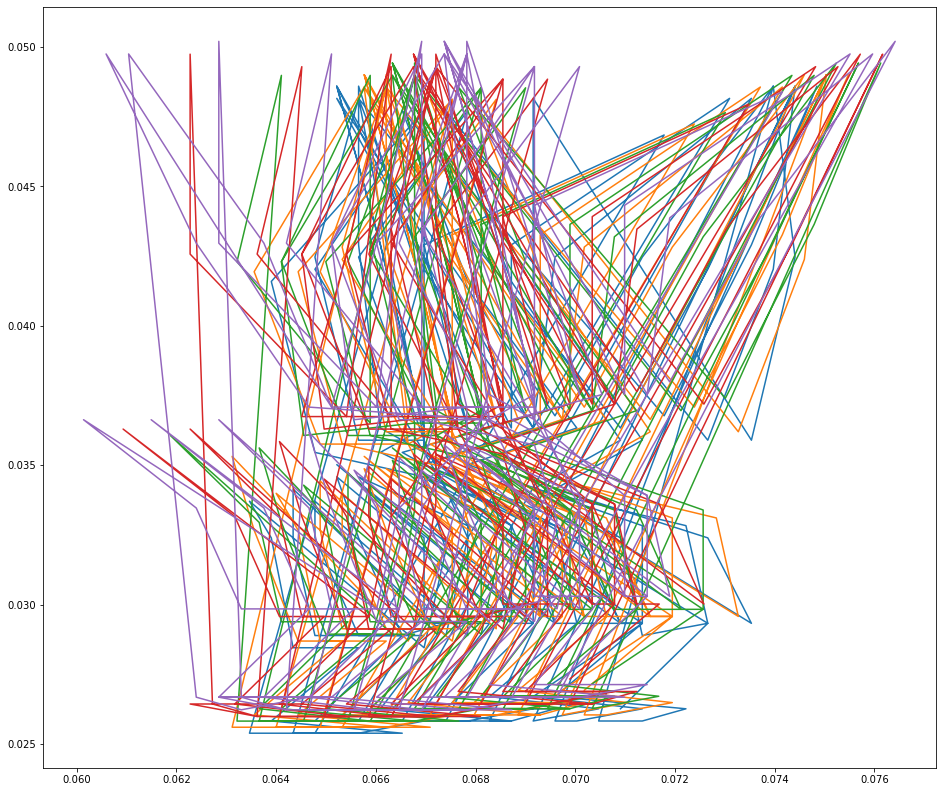

In [26]:
v = xdf.to_numpy()
for j in range(5):
    axray = pd.DataFrame(np.array([[v[j][i], v[j][i+1]] if v[j][i] != 0 else [None, None] for i in range(0, v.shape[1], 2)]), columns=['x', 'y']).dropna()
    plt.plot(axray['x'], axray['y'])
    axes = plt.gca()
plt.show()

In [30]:
axray = pd.DataFrame(np.array([[v[0][i], v[0][i+1], xdf.columns[i]] if v[0][i] != 0 else [None, None, None] for i in range(0, v.shape[1], 2)]), columns=['x', 'y', 'txt']).dropna()
axray

NameError: name 'xdf' is not defined

In [33]:
v = xdf.to_numpy()
for j in range(10):
    axray = pd.DataFrame(np.array([[v[j][i], v[j][i+1], xdf.columns[i]] if v[j][i] != 0 else [None, None, None] for i in range(0, v.shape[1], 2)]), columns=['x', 'y', 'txt'])
    #plt.plot(axray['x'].astype('float').to_numpy(), axray['y'].astype('float').to_numpy())
    for k in range(len(axray['x'].tolist())):
        plt.plot(axray['x'].astype('float').to_numpy()[k], axray['y'].astype('float').to_numpy()[k], 'o')
        plt.text(axray['x'].astype('float').to_numpy()[k], axray['y'].astype('float').to_numpy()[k], axray['txt'][k], fontsize=12)
    plt.title('Frame: ' + str(j+1))
    axes = plt.gca()
    axes.set_xlim([140,180])
    axes.set_ylim([40,120])
    plt.show()

IndexError: index 40 is out of bounds for axis 0 with size 39